<a href="https://colab.research.google.com/github/raulbenitez/introAI_ICE/blob/main/kmeans_pinguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

carregar dades

In [1]:
import seaborn as sns

df = sns.load_dataset('penguins') # load data
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

eliminar NaNs

In [9]:
df1 = df.copy()
df1.dropna(inplace=True) # eliminem els pingüins amb algun NaN
df1.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [10]:
df1.shape

(333, 7)

Representar gràficament pariplot


<Figure size 640x480 with 0 Axes>

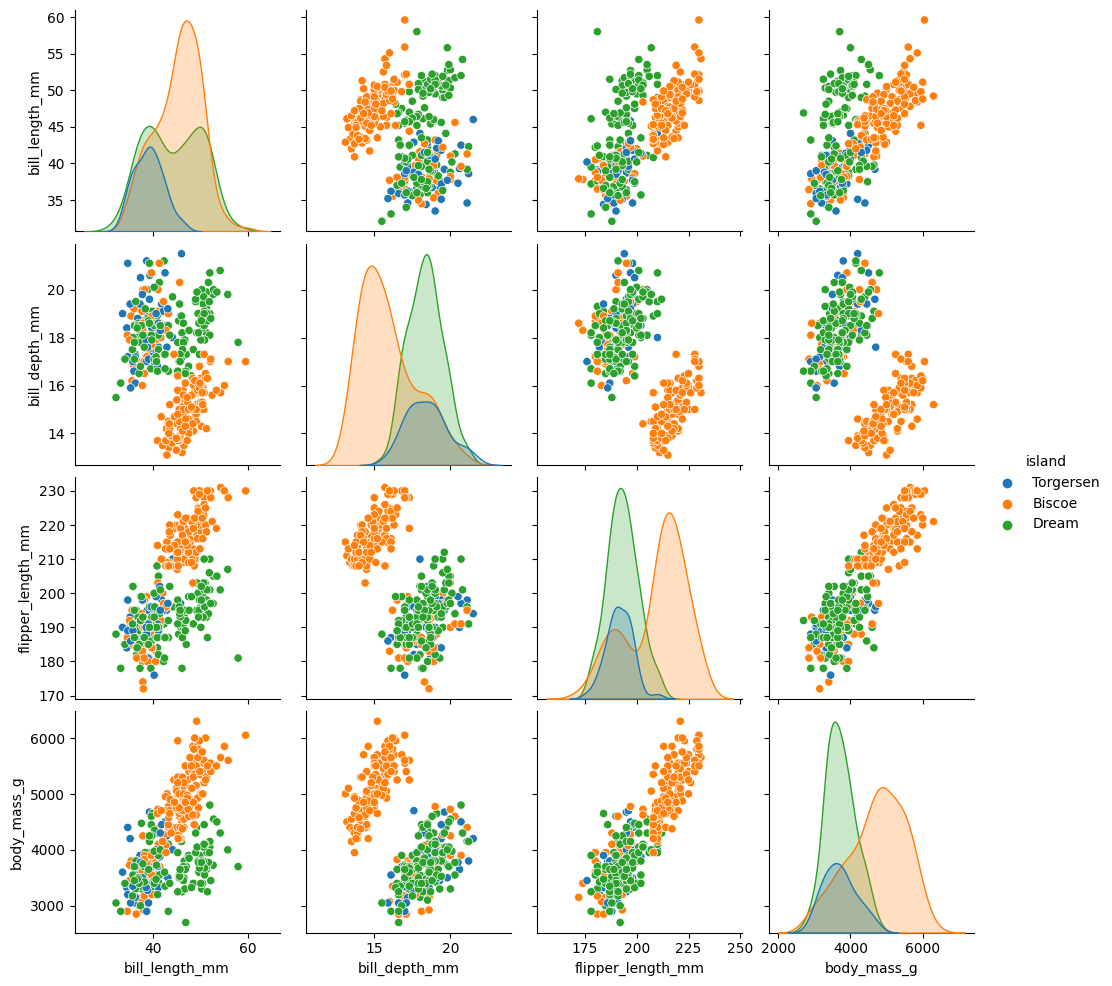

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure()
sns.pairplot(df1,hue='island')
plt.show()

Conclusions: 
- Les tres espècies són clarament diferents. 
- A l'espècie Chinstrap els mascles i femelles són clarament diferents. Als altres també però no de forma tan clara
- A les diferents illes trobem pingüins de les diferents espècies. Els Gentoo estàn a la illa de Biscoe

apliquem kmeans amb k=3 (busquem espècies)

extraure les dades de features

In [16]:
df1.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [17]:
X = df1[['bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g']]
X.shape

(333, 4)

apliquem kmeans

In [18]:
from sklearn.cluster import KMeans

grups = KMeans(n_clusters=3).fit_predict(X)
grups

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 2, 2, 0,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,

<Figure size 640x480 with 0 Axes>

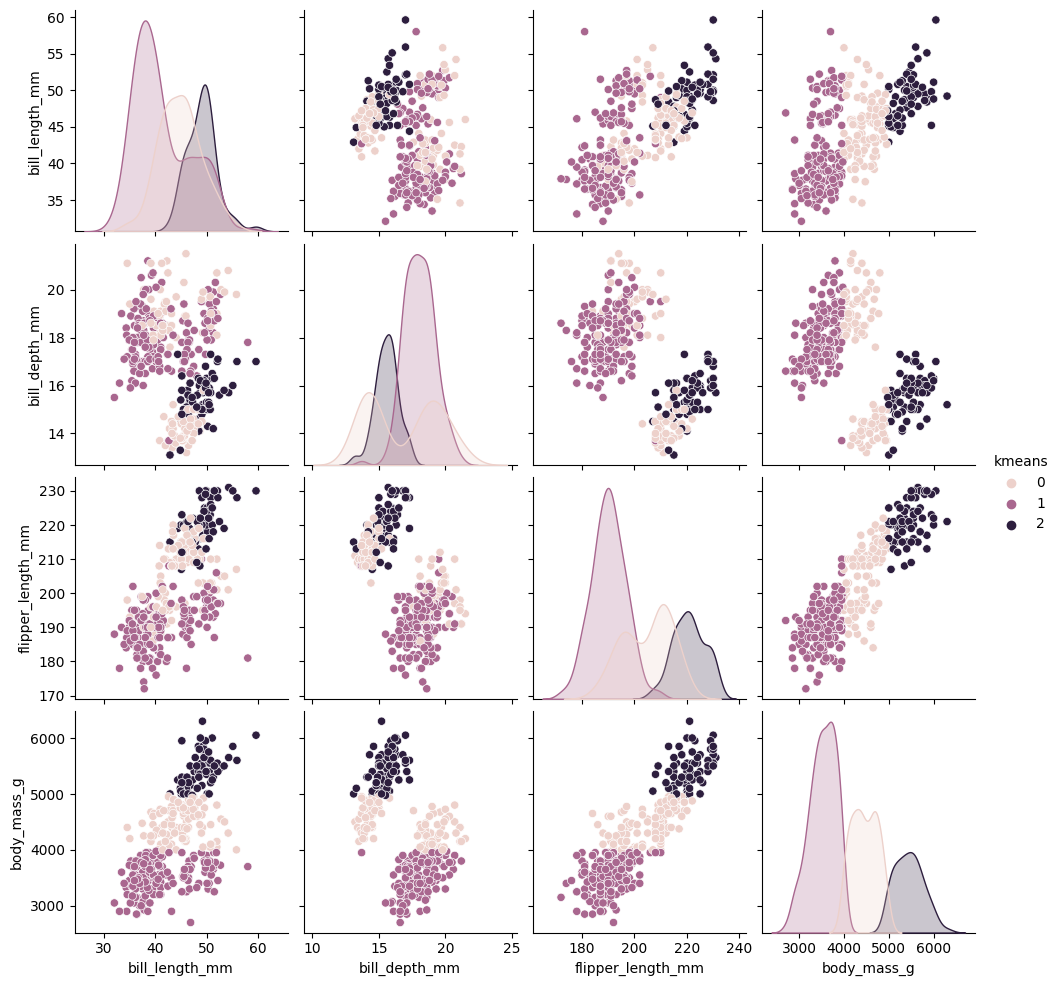

In [19]:
df3 = df1.copy()
df3['kmeans'] = grups

fig = plt.figure()
sns.pairplot(df3,hue='kmeans')
plt.show()